In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function

Autosave disabled


# Transformation of a Gaussian random variable

In [2]:
%pylab inline
import scipy.special
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [3]:
mycolors = ListedColormap([
        '#fce7e7', '#ffb7b7', '#830000', # shades of red
        '#e7f2e7', '#cce7cc', '#3e9f3e', # shades of green
        '#e7ebf1', '#ccd7e0', '#003366', # shades of blue
        '#e7ddc5', '#ddd3ac', '#beb091', '#ac9879', # shades of brown
        '#c5c5c5', '#7c7c7c', '#4f4f4f', '#3e3e3e' # shades of gray
    ])
r1, r2, r3, g1, g2, g3, b1, b2, b3, br1, br2, br3, br4, gr1, gr2, gr3, gr4 = mycolors.colors

## Gaussian random variable

$$
p(x) = \mathcal{N}(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}}
$$

Draw $n$ samples from a Gaussian random variable with mean $\mu$ and standard deviation $\sigma$:

In [4]:
n = int(1e7)
mu = 4
sigma = 2
z = numpy.random.normal(mu, sigma, n)

Estimate the mean $\hat{\mu}$ and the standard deviation $\hat{\sigma}$ from the samples:

In [5]:
mu_est, sigma_est = np.mean(z), np.std(z)
print('mu = {0}, sigma = {1}'.format(mu_est, sigma_est))

mu = 4.000359292334811, sigma = 1.9993266107603815


Estimate the probability density function $\hat{p}(x)$ of the samples with a histogram:

In [6]:
interval = (-4 * sigma + mu, 4 * sigma + mu)
n_bins = 200
hist, bins = numpy.histogram(z, n_bins, interval)

In [7]:
dx = (interval[1] - interval[0]) / n_bins
hist = hist / (sum(hist) * dx)

Show the histogram:

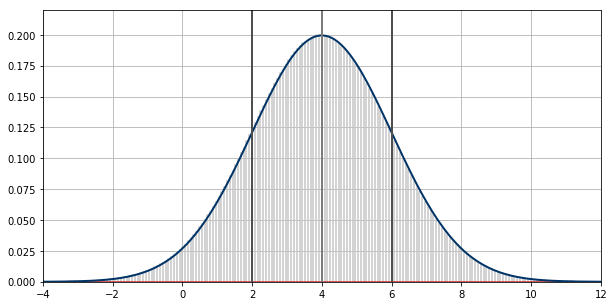

In [8]:
figure(figsize(10, 5))

ymax = max(hist) / (sum(hist) * dx) * 1.1
plt.xlim(interval)
plt.ylim(0, ymax)
plt.grid()

# draw histogram
markerline, stemlines, baseline = plt.stem(bins[:len(bins)-1], hist, markerfmt=' ')
pyplot.setp(stemlines, color = gr1)

# draw Gaussian pdf
x = linspace(interval[0], interval[1], 200)
y = exp(-.5*(x - mu_est)**2 / sigma_est**2) / (sqrt(2 * pi) * sigma_est)
plt.plot(x, y, c = b3, linewidth = 2)

# draw vertical lines for the mean and the range of the standard deviation
plt.axvline(x = mu_est, c = gr2, linewidth = 2)
plt.axvline(x = mu_est - sigma_est, c = gr3, linewidth = 2)
plt.axvline(x = mu_est + sigma_est, c = gr3, linewidth = 2);

## Transformation of the random variable

Use the cumulative density function as transformation to obtain a random variable with uniform probability density function.

Cumulative density function of a Gaussian probability function:
$$
\begin{eqnarray*}
  F(x) 
  &=& \int_{-\infty}^x \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}} \text{d}x\\
  &=& \frac{1}{2} \left( 1 + \text{erf}\left( \frac{x - \mu}{\sqrt{2} \sigma} \right) \right)
\end{eqnarray*}
$$

There is no closed form solution for this integral. The error function **erf** has to be computed numerically.

Plot the cumulative density function $F(x)$:

In [9]:
x = numpy.linspace(interval[0], interval[1], 200)
y = 0.5 * (1 + scipy.special.erf((x - mu_est) / (numpy.sqrt(2) * sigma_est)))

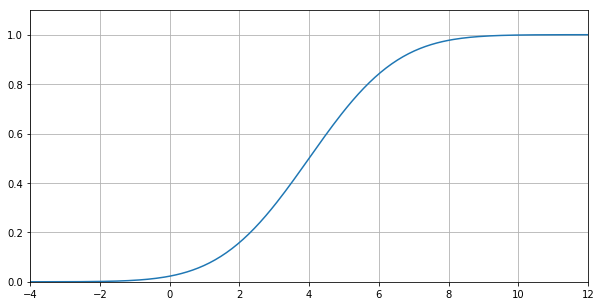

In [10]:
figure(figsize(10, 5))
plt.xlim(interval)
plt.ylim(0, 1.1)
plt.grid()
plt.plot(x, y);

Transform the samples:

In [11]:
z_transformed = 0.5 * (1 + scipy.special.erf((z - mu_est) / (numpy.sqrt(2) * sigma_est)))

Estimate the probability density function of the transformed random variable with a histogram:

In [12]:
interval = (-.1, 1.1)
n_bins = 240
hist_transformed, bins_transformed = numpy.histogram(z_transformed, n_bins, interval)

In [13]:
dx = (interval[1] - interval[0]) / n_bins
hist_transformed = hist_transformed / (sum(hist_transformed) * dx)

Visualize the histogram:

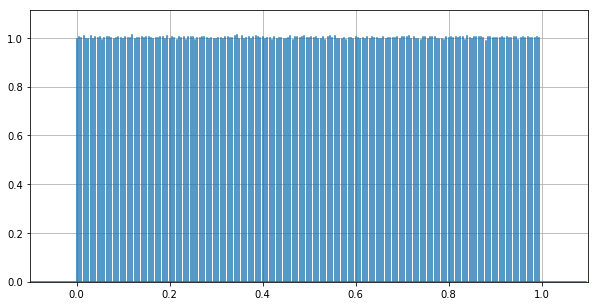

In [14]:
figure(figsize(10, 5))
ymax = max(hist_transformed) / (sum(hist_transformed) * dx) * 1.1
plt.xlim(interval)
plt.ylim(0, ymax)
plt.grid()
markerline, stemlines, baseline = plt.stem(bins_transformed[:len(bins_transformed)-1], hist_transformed, markerfmt=' ')

# Inverse transform

The cumulative density function $F(x)$ can be used to transform a random variable with a Gaussian probability density function to a random variable with a uniform probability density function. <p>
Consequently, the inverse of this cumulative densitiy function, $F^{-1}(x)$, can be used to transform a random variable with a uniform probability density function to a random variable with a Gaussian pdf.

## Random variable with a uniform probability density function

Draw $n$ samples from a random variable with a uniform probability density function in the inverval $[0, 1]$:

In [15]:
n = int(1e7)
z = rand(n)

Compute a histogram of the samples:

In [16]:
n_bins = 240
interval = (-0.1, 1.1)
hist, bins = numpy.histogram(z, n_bins, interval)

In [17]:
dx = (interval[1] - interval[0]) / n_bins
hist = hist / (sum(hist) * dx)

Visualize the histogram:

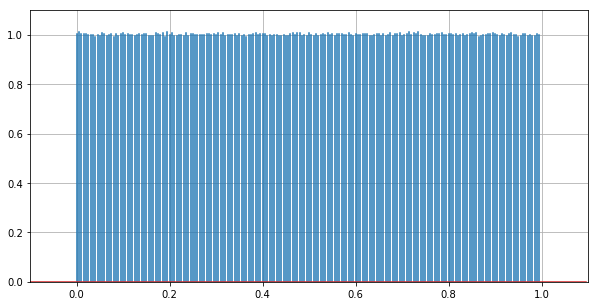

In [18]:
figure(figsize(10, 5))
plt.xlim(interval)
plt.ylim(0, 1.1)
plt.grid()
markerline, stemlines, baseline = plt.stem(bins[:len(bins)-1], hist, markerfmt=' ')

## Transformation of the random variable

The inverse of the cumulative density function of a Gaussian random variable has no closed form solution; it has to be computed numerically.

Plot the inverse of the cumulative density:

In [19]:
x = numpy.linspace(0, 1, 200)
y = scipy.special.erfinv(2 * x - 1) * numpy.sqrt(2)

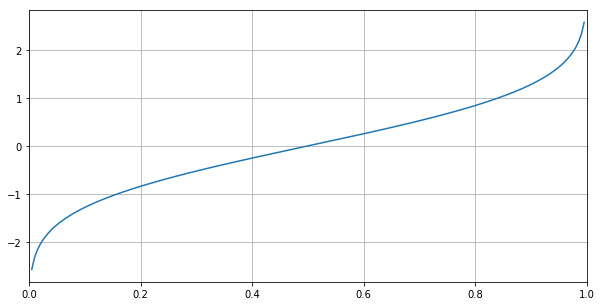

In [20]:
figure(figsize(10, 5))
plt.xlim(0, 1)
plt.grid()
plt.plot(x, y);

Transform the samples:

In [21]:
z_transformed = scipy.special.erfinv(2 * z - 1) * numpy.sqrt(2)

Estimate the mean $\hat{\mu}$ and the standard deviation $\hat{\sigma}$ from the samples:

In [22]:
mu_est, sigma_est = np.mean(z_transformed), np.std(z_transformed)
print('mu = {0}, sigma = {1}'.format(mu_est, sigma_est))

mu = -5.927070570960847e-05, sigma = 1.0000546137594433


Compute the histogram from the samples of the transformed random variable:

In [23]:
interval = (-4, +4)
n_bins = 200
hist_transformed, bins_transformed = numpy.histogram(z_transformed, n_bins, interval)

In [24]:
dx = (interval[1] - interval[0]) / n_bins
hist_transformed = hist_transformed / (sum(hist_transformed) * dx)

Visualize the histogram:

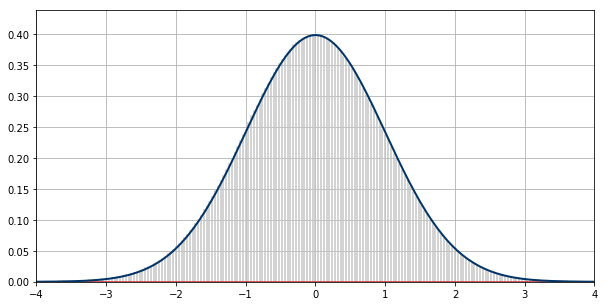

In [25]:
figure(figsize(10, 5))

ymax = max(hist_transformed) / (sum(hist_transformed) * dx) * 1.1
plt.xlim(interval)
plt.ylim(0, ymax)
plt.grid()

# draw histogram
markerline, stemlines, baseline = plt.stem(bins_transformed[:len(bins_transformed)-1], hist_transformed, markerfmt=' ')
pyplot.setp(stemlines, color = gr1)

# draw Gaussian pdf
x = linspace(interval[0], interval[1], 200)
y = exp(-.5*(x - 0.0)**2 / 1.0**2) / (sqrt(2 * pi) * 1.0)
plt.plot(x, y, c = b3, linewidth = 2);